**Data Preprocessing**

Steps:

1. Load subset of Kepler Data to pandas DF
2. Use lightkurve to get time series data for each item
3. Do math stuff


In [297]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 150
import pandas as pd
from wotan import flatten
import astropy.units as u
from astropy.time import Time

In [298]:
def get_lightcurve(id, mission):
    search_res = lk.search_lightcurve(id, mission=mission)
    lc_files = search_res.download_all()
    lc = lc_files.stitch()
    return lc

In [299]:
def show(lc):
    plt.scatter(lc.time.value, lc.flux, s=1, color='black')
    # plt.xlim(200,800)
    plt.ylim(0.995,1.005)
    plt.show()
    plt.close()

Original Light Curve:


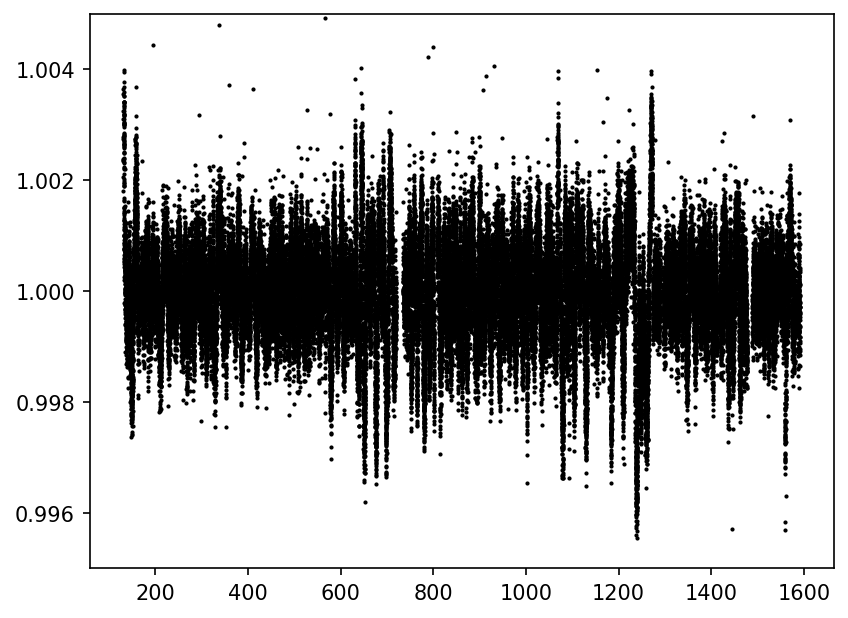

Light Curve with Gaps Filled:


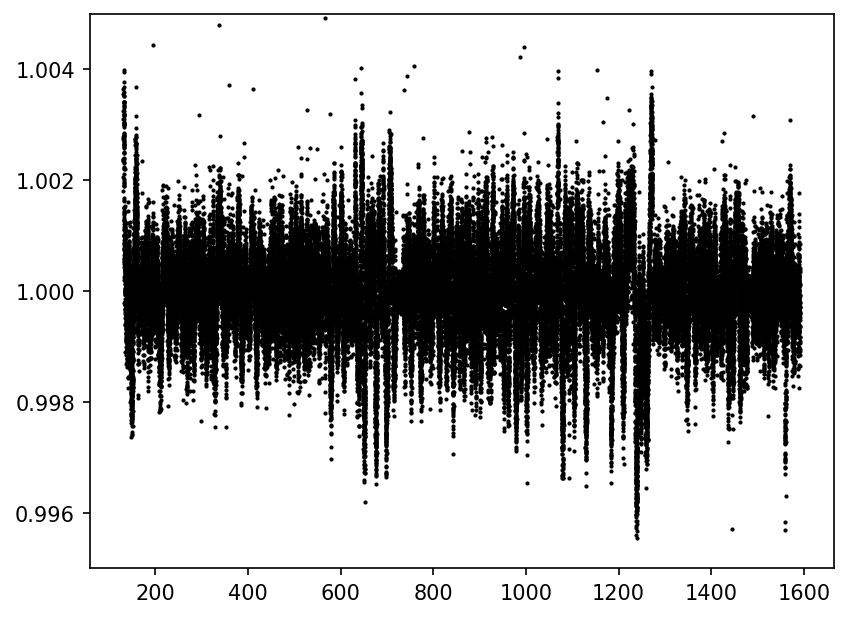

Light Curve with Outliers Removed:


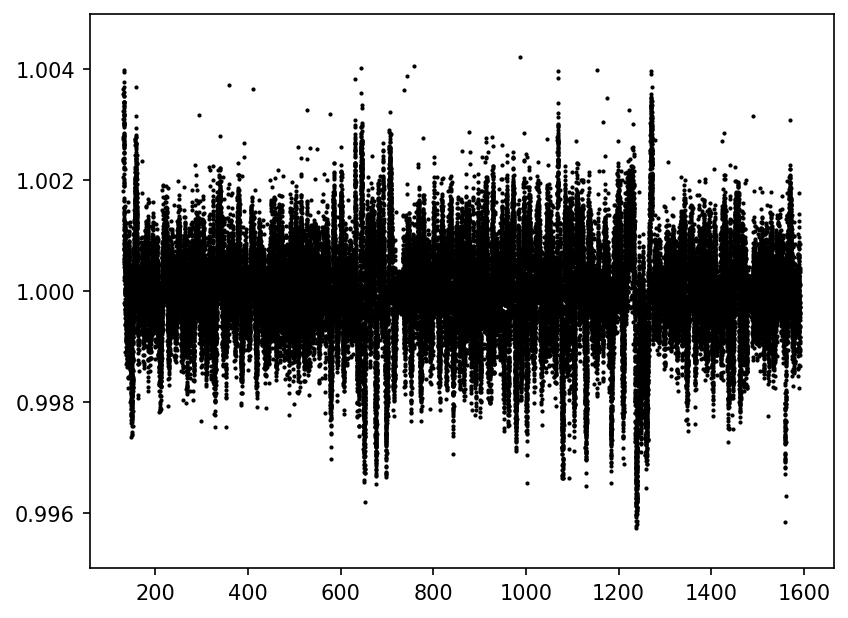

Light Curve Flattened with S-G:


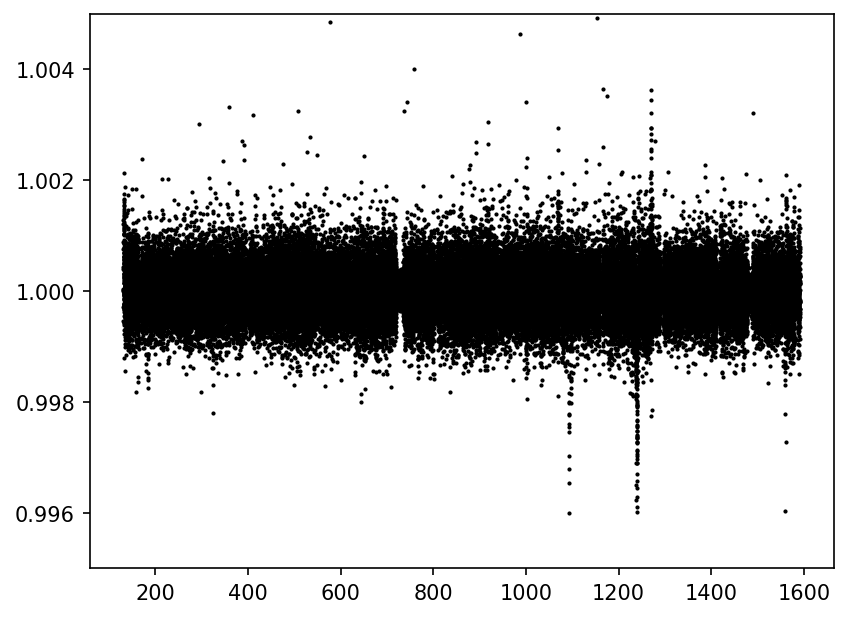

Phased folded Light Curve


/Users/karenxu/opt/anaconda3/envs/exosalience/lib/python3.10/site-packages/lightkurve/lightcurve.py:1055: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BKJD (i.e. JD - 2454833).
  warnings.warn(


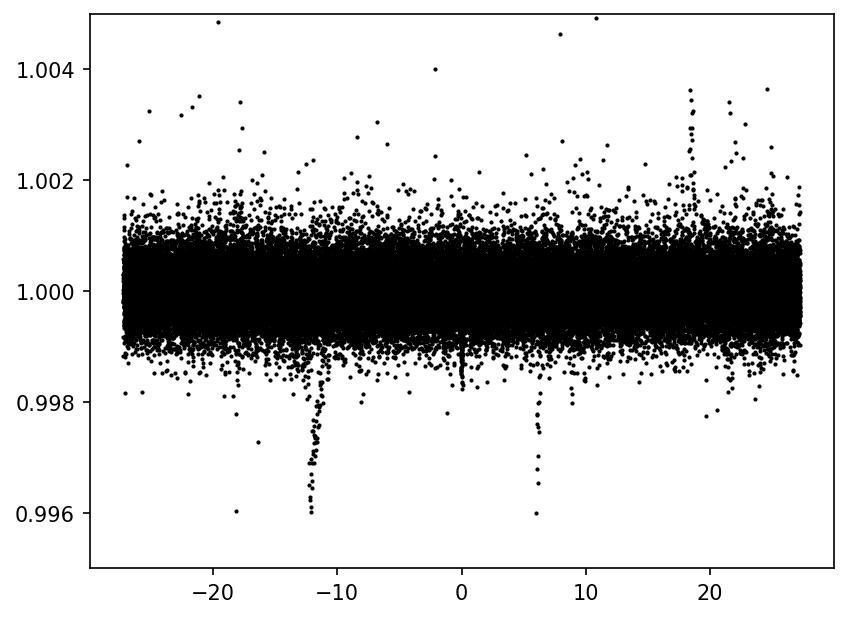

In [300]:
# KOI data csv
path_to_koi = "koi_dataset.csv"
path_to_lc_files = "./lightcurve_data"
lk.conf.cache_dir = path_to_lc_files # set light curve cache directory

# load to df
koi_df = pd.read_csv(path_to_koi)

row_count = len(koi_df)
# print(f"Kepler Objects of Interest Dataset Sample (5/{row_count} rows):")
# print(koi_df.head())

# debug
test_df = koi_df[koi_df['koi_disposition'] == 'CONFIRMED'].iloc[1:11]

for i, row in test_df.iterrows():

    kepid = row.iloc[0]
    period = row['koi_period']
    epoch = row['koi_time0bk'] + 2454833.0
    epoch = Time( epoch, format='jd', scale='tdb')
    duration = row['koi_duration']
    duration = u.Quantity(duration, unit='h')

    # get light curve from lightkurve
    print("Original Light Curve:")
    lc = get_lightcurve(f"KIC {kepid}", 'Kepler')
    show(lc)

    # fill gap
    print("Light Curve with Gaps Filled:")
    lc = lc.fill_gaps()
    show(lc)

    # remove outliers
    print("Light Curve with Outliers Removed:")
    lc = lc.remove_outliers(sigma=5.0)
    show(lc)

    # flatten
    print("Light Curve Flattened with S-G:")
    lc = lc.flatten()
    show(lc)

    # phase fold
    print("Phased folded Light Curve")
    lc = lc.fold(period=period, epoch_time=epoch, normalize_phase=False)
    show(lc)

    # define 2 bins



    break
